# Gestion et Analyse de MdP

In [1]:
import pandas as pd
import numpy as np
import random as rd

In [10]:
#Chargement du dataset

file_path = r'dataset/df12.csv'

df = pd.read_csv(file_path,
                  on_bad_lines='skip',
                  encoding="latin-1")

print(df)

      Unnamed: 0          password  length  upper  lower  digit  spe  strength
0              0          bratzcar       8      0      8      0    0         1
1              1     koos123456789      13      0      4      9    0         2
2              2        4922010001      10      0      0     10    0         1
3              3          sheeyat!       8      0      7      0    1         2
4              4     milki42766924      13      0      5      8    0         2
...          ...               ...     ...    ...    ...    ...  ...       ...
9353        9353          47chicks       8      0      6      2    0         2
9354        9354  rebelsrule952937      16      0     10      6    0         3
9355        9355            092943       6      0      0      6    0         1
9356        9356          real1341       8      0      4      4    0         2
9357        9357           caton05       7      0      5      2    0         1

[9358 rows x 8 columns]


##### Modèle Supervisé

In [17]:
%pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\kajan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
# Split into features and labels
X = df[['length', 'upper', 'lower', 'digit', 'spe']].values
y = df['strength'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


<Axes: >

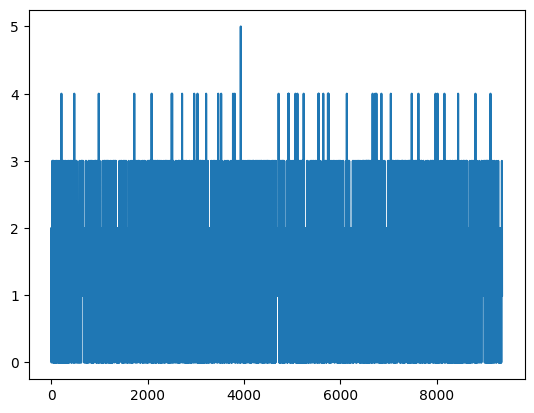

In [13]:
plt.figure()
df['strength'].astype(int).plot()

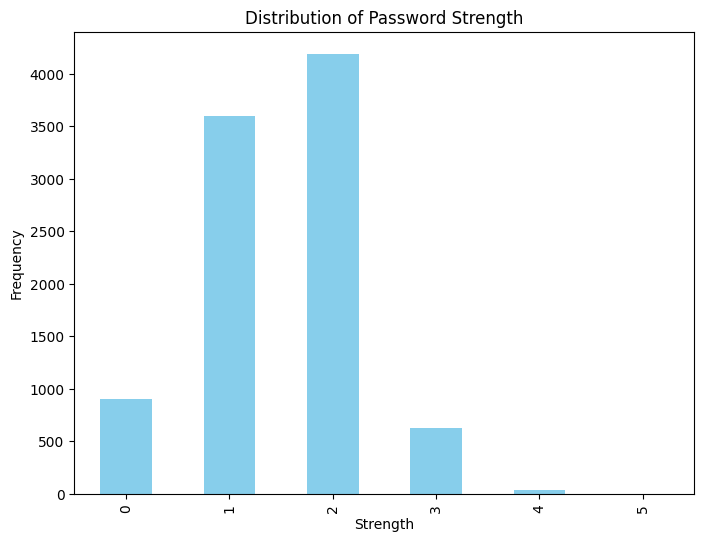

In [14]:
plt.figure(figsize=(8, 6))
df['strength'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Password Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

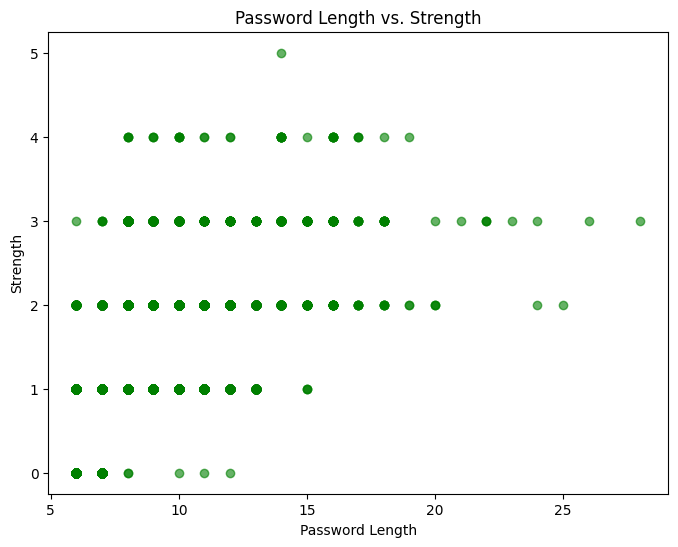

In [15]:
# Scatter plot to show the relationship between length and strength
plt.figure(figsize=(8, 6))
plt.scatter(df['length'], df['strength'], c='green', alpha=0.6)
plt.title('Password Length vs. Strength')
plt.xlabel('Password Length')
plt.ylabel('Strength')
plt.show()

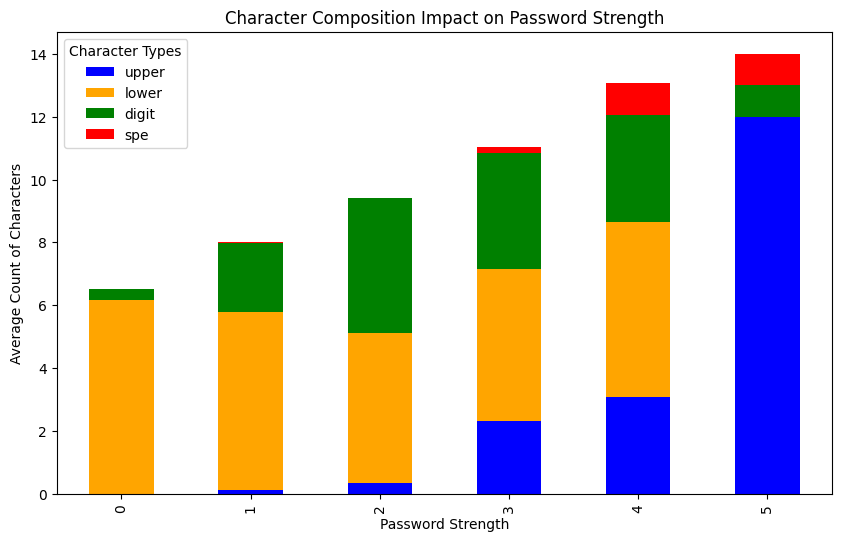

In [16]:
# Prepare data for a stacked bar chart
df_grouped = df.groupby('strength').mean(numeric_only='true')[['upper', 'lower', 'digit', 'spe']]

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange', 'green', 'red'])
plt.title('Character Composition Impact on Password Strength')
plt.xlabel('Password Strength')
plt.ylabel('Average Count of Characters')
plt.legend(title='Character Types', loc='upper left')
plt.show()
